In [1]:
from collections.abc import Iterable
import collections
try:
    from collections.abc import Iterable
except ImportError:
    from collections import Iterable
collections.Iterable = Iterable

In [2]:
from causalgraphicalmodels import CausalGraphicalModel
import pgmpy
import numpy as np
import pandas as pd

In [3]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print("Train Data Sample:")
print(train_data.head())

Train Data Sample:
   Interest_Rate  Loan_Amount_Requested  Number_of_Payments  Years_Employed  \
0          12.12               0.653888                   1               1   
1          11.14               0.752423                   0               0   
2          17.27              -0.725600                   0               9   
3           7.62              -0.627065                   0               5   
4          14.65               2.599952                   1               1   

   Annual_Income  Income_Verified  Loan_Category  State  Debt_to_Income_Ratio  \
0       0.754974                0              4     42             -0.530104   
1      -0.000577                2              2      4             -0.664851   
2      -0.306881                1              2     33             -0.914530   
3      -0.286461                1             11     39             -1.386145   
4      -0.204780                0              6     39             -1.121935   

   Delinquencies_2Y

Data preparation

In [5]:
# Loan_Amount_Requested
median_loan = train_data['Loan_Amount_Requested'].median()

# Train
train_data['Loan_Amount_Requested_Bin'] = np.where(
    train_data['Loan_Amount_Requested'] < median_loan, 'Low', 'High'
)
# Test
test_data['Loan_Amount_Requested_Bin'] = np.where(
    test_data['Loan_Amount_Requested'] < median_loan, 'Low', 'High'
)
train_data.drop(columns=['Loan_Amount_Requested'], inplace=True)
test_data.drop(columns=['Loan_Amount_Requested'], inplace=True)


In [6]:
# Debt_to_Income_Ratio
median_dti = train_data['Debt_to_Income_Ratio'].median()

train_data['Debt_to_Income_Ratio_Bin'] = np.where(
    train_data['Debt_to_Income_Ratio'] < median_dti, 'Low', 'High'
)
test_data['Debt_to_Income_Ratio_Bin'] = np.where(
    test_data['Debt_to_Income_Ratio'] < median_dti, 'Low', 'High'
)

train_data.drop(columns=['Debt_to_Income_Ratio'], inplace=True)
test_data.drop(columns=['Debt_to_Income_Ratio'], inplace=True)

In [7]:
# Loan_to_Income_Ratio
median_lti = train_data['Loan_to_Income_Ratio'].median()

train_data['Loan_to_Income_Ratio_Bin'] = np.where(
    train_data['Loan_to_Income_Ratio'] < median_lti, 'Low', 'High'
)
test_data['Loan_to_Income_Ratio_Bin'] = np.where(
    test_data['Loan_to_Income_Ratio'] < median_lti, 'Low', 'High'
)

train_data.drop(columns=['Loan_to_Income_Ratio'], inplace=True)
test_data.drop(columns=['Loan_to_Income_Ratio'], inplace=True)


In [8]:
# Interest_Rate
train_data['Interest_Rate_Bin'] = pd.qcut(
    train_data['Interest_Rate'], q=3, labels=['Low', 'Medium', 'High']
)
test_data['Interest_Rate_Bin'] = pd.qcut(
    test_data['Interest_Rate'], q=3, labels=['Low', 'Medium', 'High']
)

train_data.drop(columns=['Interest_Rate'], inplace=True)
test_data.drop(columns=['Interest_Rate'], inplace=True)


In [9]:
# Annual_Income
median_income = train_data['Annual_Income'].median()

train_data['Annual_Income_Bin'] = np.where(
    train_data['Annual_Income'] < median_income, 'Low', 'High'
)
test_data['Annual_Income_Bin'] = np.where(
    test_data['Annual_Income'] < median_income, 'Low', 'High'
)

train_data.drop(columns=['Annual_Income'], inplace=True)
test_data.drop(columns=['Annual_Income'], inplace=True)

In [10]:
# Delinquencies_2Y
median_lti = train_data['Delinquencies_2Y'].median()

train_data['Delinquencies_2Y_Bin'] = np.where(
    train_data['Delinquencies_2Y'] < median_lti, 'Low', 'High'
)
test_data['Delinquencies_2Y_Bin'] = np.where(
    test_data['Delinquencies_2Y'] < median_lti, 'Low', 'High'
)

train_data.drop(columns=['Delinquencies_2Y'], inplace=True)
test_data.drop(columns=['Delinquencies_2Y'], inplace=True)

In [11]:
# Active_Credit_Line_Ratio
median_lti = train_data['Active_Credit_Line_Ratio'].median()

train_data['Active_Credit_Line_Ratio_Bin'] = np.where(
    train_data['Active_Credit_Line_Ratio'] < median_lti, 'Low', 'High'
)
test_data['Active_Credit_Line_Ratio_Bin'] = np.where(
    test_data['Active_Credit_Line_Ratio'] < median_lti, 'Low', 'High'
)

train_data.drop(columns=['Active_Credit_Line_Ratio'], inplace=True)
test_data.drop(columns=['Active_Credit_Line_Ratio'], inplace=True)

In [12]:
# Funded_to_Requested_Ratio
median_lti = train_data['Funded_to_Requested_Ratio'].median()

train_data['Funded_to_Requested_Ratio_Bin'] = np.where(
    train_data['Funded_to_Requested_Ratio'] < median_lti, 'Low', 'High'
)
test_data['Funded_to_Requested_Ratio_Bin'] = np.where(
    test_data['Funded_to_Requested_Ratio'] < median_lti, 'Low', 'High'
)

train_data.drop(columns=['Funded_to_Requested_Ratio'], inplace=True)
test_data.drop(columns=['Funded_to_Requested_Ratio'], inplace=True)

In [13]:
# Derogatory_Public_Records
median_lti = train_data['Derogatory_Public_Records'].median()

train_data['Derogatory_Public_Records_Bin'] = np.where(
    train_data['Derogatory_Public_Records'] < median_lti, 'Low', 'High'
)
test_data['Derogatory_Public_Records_Bin'] = np.where(
    test_data['Derogatory_Public_Records'] < median_lti, 'Low', 'High'
)

train_data.drop(columns=['Derogatory_Public_Records'], inplace=True)
test_data.drop(columns=['Derogatory_Public_Records'], inplace=True)

In [14]:
# Total_Credit_Revolving_Balance
median_lti = train_data['Total_Credit_Revolving_Balance'].median()

train_data['Total_Credit_Revolving_Balance_Bin'] = np.where(
    train_data['Total_Credit_Revolving_Balance'] < median_lti, 'Low', 'High'
)
test_data['Total_Credit_Revolving_Balance_Bin'] = np.where(
    test_data['Total_Credit_Revolving_Balance'] < median_lti, 'Low', 'High'
)

train_data.drop(columns=['Total_Credit_Revolving_Balance'], inplace=True)
test_data.drop(columns=['Total_Credit_Revolving_Balance'], inplace=True)

In [15]:
# Revolving_Utilization_Rate
median_lti = train_data['Revolving_Utilization_Rate'].median()

train_data['Revolving_Utilization_Rate_Bin'] = np.where(
    train_data['Revolving_Utilization_Rate'] < median_lti, 'Low', 'High'
)
test_data['Revolving_Utilization_Rate_Bin'] = np.where(
    test_data['Revolving_Utilization_Rate'] < median_lti, 'Low', 'High'
)

train_data.drop(columns=['Revolving_Utilization_Rate'], inplace=True)
test_data.drop(columns=['Revolving_Utilization_Rate'], inplace=True)

In [16]:
# Credit_Inquiries_6M
median_lti = train_data['Credit_Inquiries_6M'].median()

train_data['Credit_Inquiries_6M_Bin'] = np.where(
    train_data['Credit_Inquiries_6M'] < median_lti, 'Low', 'High'
)
test_data['Credit_Inquiries_6M_Bin'] = np.where(
    test_data['Credit_Inquiries_6M'] < median_lti, 'Low', 'High'
)

train_data.drop(columns=['Credit_Inquiries_6M'], inplace=True)
test_data.drop(columns=['Credit_Inquiries_6M'], inplace=True)

In [17]:
train_data.drop(columns=['Income_Verified','Total_Credit_Lines','Days_Between_X15_X23','Initial_Listing_Status'], inplace=True)
test_data.drop(columns=['Income_Verified','Total_Credit_Lines','Days_Between_X15_X23','Initial_Listing_Status'], inplace=True)

In [18]:
print("Training columns after discretization:\n", train_data.columns)
print("\nSample of training data:\n", train_data.head())

Training columns after discretization:
 Index(['Number_of_Payments', 'Years_Employed', 'Loan_Category', 'State',
       'Loan_Amount_Requested_Bin', 'Debt_to_Income_Ratio_Bin',
       'Loan_to_Income_Ratio_Bin', 'Interest_Rate_Bin', 'Annual_Income_Bin',
       'Delinquencies_2Y_Bin', 'Active_Credit_Line_Ratio_Bin',
       'Funded_to_Requested_Ratio_Bin', 'Derogatory_Public_Records_Bin',
       'Total_Credit_Revolving_Balance_Bin', 'Revolving_Utilization_Rate_Bin',
       'Credit_Inquiries_6M_Bin'],
      dtype='object')

Sample of training data:
    Number_of_Payments  Years_Employed  Loan_Category  State  \
0                   1               1              4     42   
1                   0               0              2      4   
2                   0               9              2     33   
3                   0               5             11     39   
4                   1               1              6     39   

  Loan_Amount_Requested_Bin Debt_to_Income_Ratio_Bin Loan_to_Income_

Hillclimb Algorithm

In [19]:
from pgmpy.estimators import HillClimbSearch,ExhaustiveSearch, BicScore
from pgmpy.estimators import MaximumLikelihoodEstimator, HillClimbSearch, TreeSearch, PC

est_hill = HillClimbSearch(train_data)    # estimator

best_hill_model = est_hill.estimate(scoring_method=BicScore(train_data))

  0%|          | 0/1000000 [00:00<?, ?it/s]

<class 'graphviz.graphs.Digraph'>


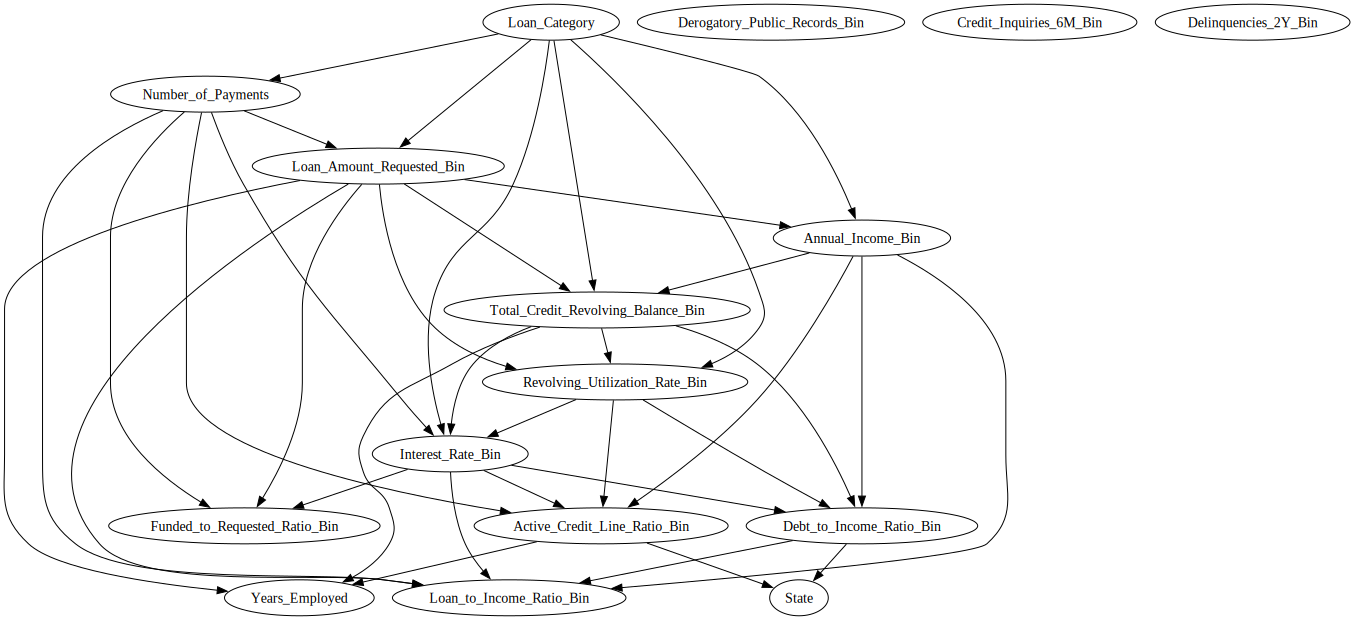

'loan_pgm.pdf'

In [20]:
model1 = CausalGraphicalModel(nodes=best_hill_model.nodes(), edges=best_hill_model.edges())

dot = model1.draw()
print(type(dot))
display(dot)
dot.render(filename="loan_pgm", format="pdf")

In [21]:
hc_model = BayesianNetwork(best_hill_model.edges())
hc_model.fit(train_data, estimator=MaximumLikelihoodEstimator)
for cpd in hc_model.get_cpds():
    print(f"Hill Climb Model - CPD of {cpd.variable}:\n{cpd}\n")

Hill Climb Model - CPD of Number_of_Payments:
+-----------------------+-----+---------------------+
| Loan_Category         | ... | Loan_Category(13)   |
+-----------------------+-----+---------------------+
| Number_of_Payments(0) | ... | 0.8154533844189017  |
+-----------------------+-----+---------------------+
| Number_of_Payments(1) | ... | 0.18454661558109833 |
+-----------------------+-----+---------------------+

Hill Climb Model - CPD of Interest_Rate_Bin:
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+

Hill Climb Model - CPD of Loan_Amount_Requested_Bin:
+---------------------------------+-----+-----------------------+
| Loan_Category                   | ... | Loan_Category(13)     |
+---------------------------------+-----+-----------------------+
| Number_of_Payments              | ... | Number_of_Payments(1) |
+---------------------------------+-----+-----------------------+
| Loan_Amount_Requested_Bi

Tree Search Algorithm

In [22]:
tree_search = TreeSearch(data=train_data)
tree_model = tree_search.estimate()
print("Tree Search Model:", tree_model.edges())

Building tree:   0%|          | 0/120.0 [00:00<?, ?it/s]

Tree Search Model: [('Loan_Amount_Requested_Bin', 'Loan_to_Income_Ratio_Bin'), ('Loan_Amount_Requested_Bin', 'Total_Credit_Revolving_Balance_Bin'), ('Loan_Amount_Requested_Bin', 'Number_of_Payments'), ('Loan_Amount_Requested_Bin', 'Annual_Income_Bin'), ('Loan_Amount_Requested_Bin', 'Loan_Category'), ('Total_Credit_Revolving_Balance_Bin', 'Debt_to_Income_Ratio_Bin'), ('Total_Credit_Revolving_Balance_Bin', 'Years_Employed'), ('Number_of_Payments', 'Interest_Rate_Bin'), ('Number_of_Payments', 'Funded_to_Requested_Ratio_Bin'), ('Annual_Income_Bin', 'Active_Credit_Line_Ratio_Bin'), ('Debt_to_Income_Ratio_Bin', 'State'), ('Interest_Rate_Bin', 'Revolving_Utilization_Rate_Bin')]


<class 'graphviz.graphs.Digraph'>


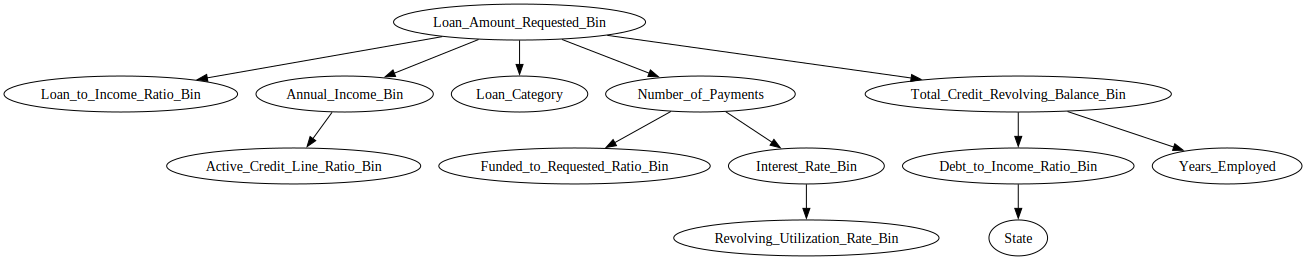

'loan_pgm.pdf'

In [23]:
model2 = CausalGraphicalModel(nodes=tree_model.nodes(), edges=tree_model.edges())

dot = model2.draw()
print(type(dot))
display(dot)
dot.render(filename="loan_pgm", format="pdf")

In [24]:
tree_model = BayesianNetwork(tree_model.edges())
tree_model.fit(train_data, estimator=MaximumLikelihoodEstimator)
for cpd in tree_model.get_cpds():
    print(f"Tree Search Model - CPD of {cpd.variable}:\n{cpd}\n")

Tree Search Model - CPD of Loan_Amount_Requested_Bin:
+---------------------------------+----------+
| Loan_Amount_Requested_Bin(High) | 0.532873 |
+---------------------------------+----------+
| Loan_Amount_Requested_Bin(Low)  | 0.467127 |
+---------------------------------+----------+

Tree Search Model - CPD of Loan_to_Income_Ratio_Bin:
+--------------------------------+-----+--------------------------------+
| Loan_Amount_Requested_Bin      | ... | Loan_Amount_Requested_Bin(Low) |
+--------------------------------+-----+--------------------------------+
| Loan_to_Income_Ratio_Bin(High) | ... | 0.23485701418599414            |
+--------------------------------+-----+--------------------------------+
| Loan_to_Income_Ratio_Bin(Low)  | ... | 0.7651429858140059             |
+--------------------------------+-----+--------------------------------+

Tree Search Model - CPD of Total_Credit_Revolving_Balance_Bin:
+-----+--------------------------------+
| ... | Loan_Amount_Requested_Bin(

Fit model to data

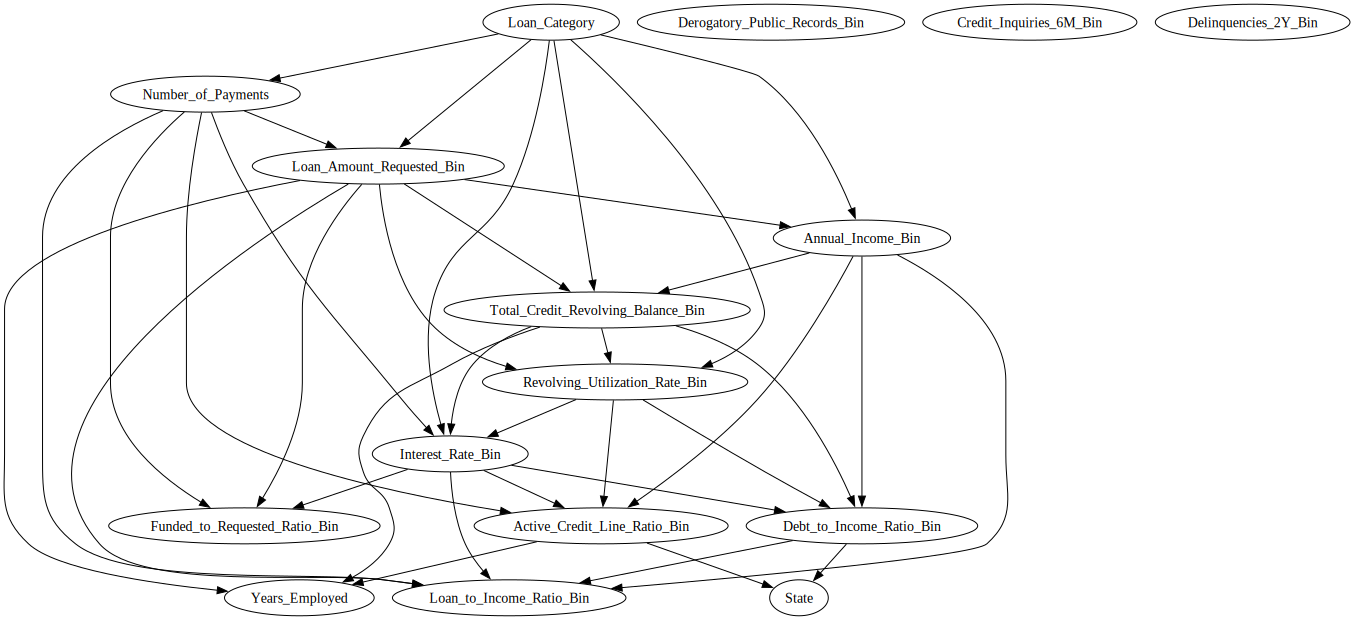

Hill Climb Search BIC Score: -509226.62892800174


In [25]:
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.metrics import structure_score

network1 = BayesianNetwork(best_hill_model)
mle = MaximumLikelihoodEstimator(network1, test_data)

# estimate the CPDs of the model and add to the model

for cpd in mle.get_parameters():
    network1.add_cpds(cpd)

# Get nodes and edges from the BayesianNetwork
nodes = network1.nodes()
edges = network1.edges()

# Now create the CausalGraphicalModel with nodes and edges
dot = CausalGraphicalModel(nodes=nodes, edges=edges).draw()
display(dot)
dot.render("loan_pgm_with_cpt", format="pdf")

expected_cols = hc_model.nodes()
relevant_test_data = test_data[[col for col in expected_cols if col in test_data.columns]]
hc_bic = structure_score(hc_model, relevant_test_data, scoring_method="bic")
print(f"Hill Climb Search BIC Score: {hc_bic}")

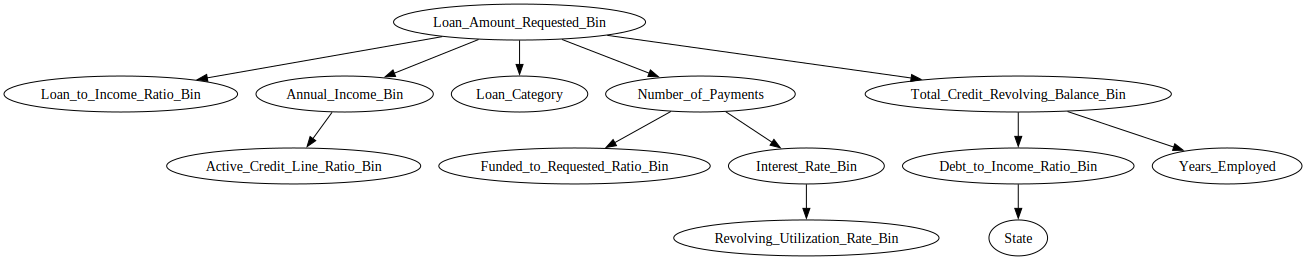

Tree Search BIC Score: -517808.20681191783


In [26]:
network2 = BayesianNetwork(tree_model)
mle = MaximumLikelihoodEstimator(network2, test_data)

# estimate the CPDs of the model and add to the model

for cpd in mle.get_parameters():
    network2.add_cpds(cpd)

# Get nodes and edges from the BayesianNetwork
nodes = network2.nodes()
edges = network2.edges()

# Now create the CausalGraphicalModel with nodes and edges
dot = CausalGraphicalModel(nodes=nodes, edges=edges).draw()
display(dot)
dot.render("loan_cpt", format="pdf")

expected_cols = tree_model.nodes()
relevant_test_data = test_data[[col for col in expected_cols if col in test_data.columns]]
tree_bic = structure_score(tree_model, relevant_test_data, scoring_method="bic")
print(f"Tree Search BIC Score: {tree_bic}")

In [36]:
infer = VariableElimination(tree_model)
query = infer.query(['Interest_Rate_Bin'], evidence={
  'Loan_Amount_Requested_Bin': 'High',
  'Number_of_Payments': 1,
    'Annual_Income_Bin': 'Low'
})
print(query)

+---------------------------+--------------------------+
| Interest_Rate_Bin         |   phi(Interest_Rate_Bin) |
+===========================+==========================+
| Interest_Rate_Bin(High)   |                   0.6522 |
+---------------------------+--------------------------+
| Interest_Rate_Bin(Low)    |                   0.1014 |
+---------------------------+--------------------------+
| Interest_Rate_Bin(Medium) |                   0.2464 |
+---------------------------+--------------------------+
